Aparência: sol, nublado, chuva
Temperatura: -130 ~ 130 F
Umidade: 0 ~ 100
Jogar: sim/nao
Tratar valores NAs

### Análise

In [61]:
import pandas as pd

In [120]:
df = pd.read_csv("../Data/tempo.csv", sep=";")

In [5]:
df.head(5)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [12]:
df.shape

(14, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


In [16]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Aparencia,14,4,sol,5
Vento,13,2,FALSO,7
Jogar,14,2,sim,9


In [17]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperatura,14.0,155.571429,306.433759,64.0,69.25,73.5,80.75,1220.0
Umidade,13.0,89.769231,34.540203,65.0,70.00,85.0,90.00,200.0


In [18]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [24]:
for a in df.select_dtypes('object'):
    print(a)
    print(df[a].value_counts(dropna=False))
    print("-"*30)

Aparencia
sol        5
chuva      5
nublado    3
menos      1
Name: Aparencia, dtype: int64
------------------------------
Vento
FALSO         7
VERDADEIRO    6
NaN           1
Name: Vento, dtype: int64
------------------------------
Jogar
sim    9
nao    5
Name: Jogar, dtype: int64
------------------------------


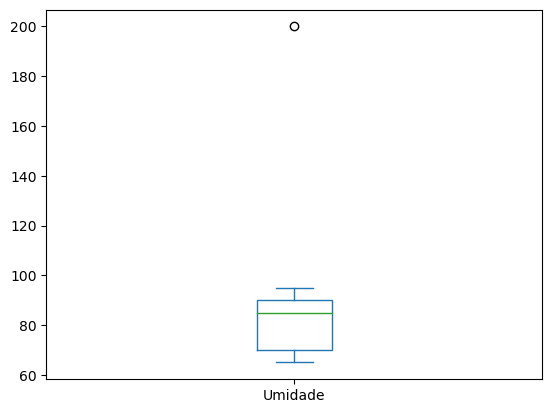

In [42]:
df["Umidade"].plot.box();

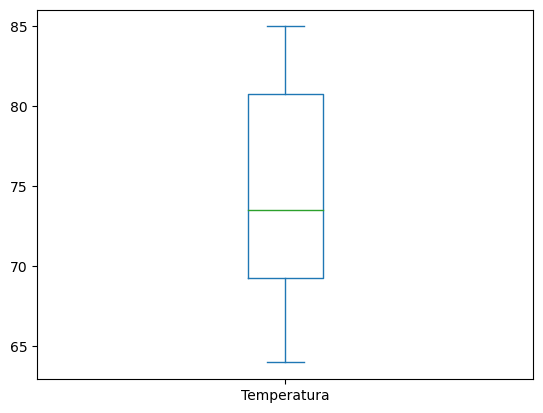

In [41]:
df["Temperatura"].plot.box(showfliers=False);

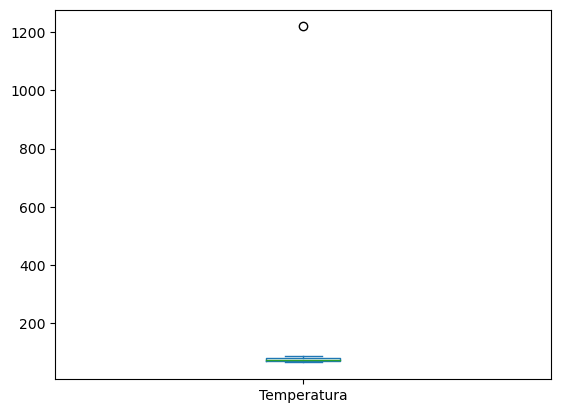

In [43]:
df["Temperatura"].plot.box();

In [101]:
df.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

### Tratamento

>Observações
* Temperatura e umidade possuem valores discrepantes
* Aparencia possui um valor inadequado
* Umidade e vento possuem Nulos

>Decisões
* Em aparencia o valor inadequado será subistituído pela moda de temperatura com características mais próximas visto que é bimodal
* Os nulos e valores discrepantes serão subistituídos pelas modas das devidas colunas

In [50]:
print("chuva")
print(df[df["Aparencia"] == "chuva"].describe().T)
print()
print("sol")
print(df[df["Aparencia"] == "sol"].describe().T)
print()
print("nublado")
print(df[df["Aparencia"] == "nublado"].describe().T)
print()
print("menos")
print(df[df["Aparencia"] == "menos"].describe().T)

chuva
             count    mean        std   min   25%   50%     75%    max
Temperatura    5.0   69.80   3.701351  65.0  68.0  70.0   71.00   75.0
Umidade        4.0  110.25  60.444878  70.0  77.5  85.5  118.25  200.0

sol
             count   mean         std   min   25%   50%   75%     max
Temperatura    5.0  305.8  511.087762  69.0  75.0  80.0  85.0  1220.0
Umidade        5.0   82.0   11.510864  70.0  70.0  85.0  90.0    95.0

nublado
             count       mean       std   min   25%   50%   75%   max
Temperatura    3.0  78.666667  5.859465  72.0  76.5  81.0  82.0  83.0
Umidade        3.0  83.666667  7.767453  75.0  80.5  86.0  88.0  90.0

menos
             count  mean  std   min   25%   50%   75%   max
Temperatura    1.0  64.0  NaN  64.0  64.0  64.0  64.0  64.0
Umidade        1.0  65.0  NaN  65.0  65.0  65.0  65.0  65.0


A "Aparececia" com caracterísicas mais próxima é "chuva"

In [122]:
df.loc[df["Aparencia"] == "menos", "Aparencia"] = "chuva"

In [123]:
# Tratamento de temperaturas
df.loc[df["Temperatura"] > 130, "Temperatura"] = df["Temperatura"].mode()[0]

# Tratamento de umidade
df.loc[df["Umidade"] > 100, "Umidade"] = df["Umidade"].mode()
df["Umidade"].fillna(df["Umidade"].mode()[0], inplace=True)

# Tratamento de Vento
df["Vento"].fillna((df["Vento"].mode()[0]), inplace=True)


* Checando mudanças

In [124]:
df.isna().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [125]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperatura,14.0,73.785714,6.565394,64.0,69.25,73.5,78.75,85.0
Umidade,14.0,79.071429,10.171334,65.0,70.00,77.5,89.00,95.0


In [126]:
for a in df.select_dtypes('object'):
    print(a)
    print(df[a].value_counts(dropna=False))
    print("-"*30)

Aparencia
chuva      6
sol        5
nublado    3
Name: Aparencia, dtype: int64
------------------------------
Vento
FALSO         8
VERDADEIRO    6
Name: Vento, dtype: int64
------------------------------
Jogar
sim    9
nao    5
Name: Jogar, dtype: int64
------------------------------
